
# Project: Investigate a Dataset - Medical Appointment No-Shows
### Investigate reasons why patients do no show up for their medical appointments


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#q1">Question 1:</a> Are Scholarship patients more or less likely to show up for their appointments?</li>
                <li><a href="#q2">Question 2:</a> Are patients from certain neighbourhoods less likely to not show up for an appointment? </li>
                <li><a href="#q3">Question 3:</a> What factor does gender play in customers missing appointments?</li>
                <li><a href="#q4">Question 4:</a> Does the day of the week for the appointment lead to more no shows?</li>
                <li><a href="#q5">Question 5:</a> If a patient receives an SMS reminder, are they more likely to make their appointments?</li>
        <li><a href="#q6">Question 6:</a> Does patient age play a role in the number of no shows?</li>
                <li><a href="#q7">Question 7:</a> Do patients with pre-existing conditions have a tendency to make their appoints more often?</li>
        
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- No-show will have a value of 'Yes' if a patient does not show up for a sceduled appointment

>**Note:** Limited analysis was done without including No Show data.  Given that the data was collected to determine why patients did not show up for appointments, that was the focus of the analysis.  

In [1]:
# Import packages needed for analysis
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load data into data frame and show example rows.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- Info shows that no null values are in the data set.  Noted that ScheduledDay and AppointmentDay are not in standard date/time format.

In [4]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

- Most of the data is Boolean in nature but age could be cut to create groupings

In [5]:
#check number of unique values for each column.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- Noted that handcap had 5 different values even though Kaggle indicates this is a True/False column (will take care of this later) 

In [6]:
sum(df.duplicated())

0

- No duplicated rows were found

In [7]:
df.shape

(110527, 14)


### Data Cleaning 

The data was very clean upon initial view but there are a few cleanup steps required before beginning the analysis steps

- convert all column headings to lower case
- convert date/time columns to date/time format and create a day of week value for appointmentday
- Make naming conventions consistent by changing no-show to no_show
- Modify the no_show column to convert the "Yes" / "No" strings to 1 / 0 to make analysis easier.
- Update the "handcap" values of 2, 3 & 4 to a value of 1.  Per Kaggle this data is True/False in nature


In [8]:
# Convert all column lables to lower case
df.columns = df.columns.str.lower()

In [9]:
# convert date/time data to date/time format
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [10]:
# Create day of week (str and numeric) and day of month data
df['day_of_week'] = df['appointmentday'].dt.weekday_name
df['day_of_weekn'] = df['appointmentday'].dt.weekday
df['day_of_mthn'] = df['appointmentday'].dt.day

In [11]:
#Rename column to use "_" instead of "-"
df=df.rename(columns = {'no-show':'no_show'})

In [12]:
#convert no show values from strings to integers for easier analysis.
df.no_show.replace(('Yes', 'No'), (1, 0), inplace=True)

In [13]:
# Update values in handcap column so that all values above 1 are converted to 1.
df.handcap.replace((2,3,4), (1,1,1), inplace=True)

In [14]:
# Validate changes
df.head()

patientid  appointmentid gender        scheduledday appointmentday  age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   56   

       neighbourhood  scholarship  hipertension  diabetes  alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   handcap  sms_received  no_show day_of_week  day_of_weekn  day_of_mthn  
0        0             0        0      Friday             4           29  
1        0             0        0      Friday             4           29  
2        0             0        0      Friday             4           29  
3        0             0        0      Friday             4           29  
4        0             0        0      Friday             4           29

In [15]:
def plot_data(df,ptype,hsize,vsize,ptitle,pxlabel,pylabel,pxtick_loc=None,pxtick_lbl=None,pxtick_rot=None,plegend_lbl=None):

    #Function to streamline plotting of data.  Currently only accepts parameters used in the analsys.
    #Inputs: dataframe, kind of plot, horiz and vert plot size, title, labels, xtick labels and orientation, legend labels
    #Return: None
   
    df.plot(kind=ptype,figsize=(hsize,vsize),title=ptitle)
    plt.xlabel(pxlabel,fontsize=12)
    plt.ylabel(pylabel,fontsize=12)
    if not pxtick_loc is None and not pxtick_lbl is None and not pxtick_rot is None:
        plt.xticks(pxtick_loc,pxtick_lbl,rotation=pxtick_rot)
    if not plegend_lbl is None:
        plt.legend(labels=plegend_lbl)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Research Question 1: Are Scholarship patients more or less likely to show up for their appointments?


In [16]:
# create data frames with subsets of dataAre Scholarship patients more or less likely to show up for their appointments?
df_noshow = df.query("no_show == 1")
df_show = df.query("no_show == 0")
df_sch = df.query("scholarship == 1")

In [17]:
print("Total Number of Scholarship Patients: {}".format(df_sch.no_show.count()))

Total Number of Scholarship Patients: 10861


In [18]:
print("Mean percentage of No Shows: {}".format(df.query('no_show == 1')['no_show'].sum()/df.no_show.count()))


Mean percentage of No Shows: 0.20193255946510807


In [19]:
print("Mean percentage of No Shows for Patients on Scholarship: {}"
      .format(df_sch.query('no_show == 1')['no_show'].sum()/df_sch.no_show.count()))

Mean percentage of No Shows for Patients on Scholarship: 0.2373630420771568


>**Findings:**

<ul>
    <ul>
        <li>Approximately 10% of appointment data was for patients with Scholarship.
<li>Patients on Scholarship (Brazillian Welfare Program) are more likely to miss their apppointments but it is unclear from the data provided as to why. 
    </ul>
    </ul>
<hr>
<a id='q2'></a>
### Research Question 2: Are patients from certain neighbourhoods less likely to not show up for an appointment?  What impact does scholarship have on this data?

In [20]:
# Create data frame grouped by neighbourhood
df_nb = df.groupby('neighbourhood')['no_show'].count().reset_index()
df_nb.head()

neighbourhood  no_show
0            AEROPORTO        8
1           ANDORINHAS     2262
2      ANTÔNIO HONÓRIO      271
3  ARIOVALDO FAVALESSA      282
4       BARRO VERMELHO      423

- Count of records by neighbourhood.  no_show is simply the column chosen to count, it does not reflect a count of no_shows

In [21]:
#create data frame with sum of no_show and scholarship data
df_nb_sum = df.groupby('neighbourhood')['no_show','scholarship'].sum().reset_index()
#rename columns for concat operation later
df_nb_sum = df_nb_sum.rename(columns = {'no_show':'nb_noshow', 'scholarship':'nb_sch'})

df_nb_sum.head()

neighbourhood  nb_noshow  nb_sch
0            AEROPORTO          1       0
1           ANDORINHAS        521     323
2      ANTÔNIO HONÓRIO         50      14
3  ARIOVALDO FAVALESSA         62      52
4       BARRO VERMELHO         91       0

- sum of no shows and scholarships by neighbourhood

In [22]:
#Create datafrome grouped by neighbourhood for patients on scholarship
df_nbsch = df_sch.groupby('neighbourhood')['no_show','scholarship'].sum().reset_index()
df_nbsch = df_nbsch.rename(columns = {'no_show':'nbsch_noshow', 'scholarship':'nbsch_sch'})

df_nbsch.head()

neighbourhood  nbsch_noshow  nbsch_sch
0           ANDORINHAS            92        323
1      ANTÔNIO HONÓRIO             5         14
2  ARIOVALDO FAVALESSA             8         52
3           BELA VISTA            47        225
4       BENTO FERREIRA             7         23

- Sum of no shows and scholarship from the scholarship dataframe.

In [23]:
#set all indexes to neighbourhood for joining in next steps
df_nb.set_index('neighbourhood',inplace=True)
df_nb_sum.set_index('neighbourhood', inplace=True)
df_nbsch.set_index('neighbourhood', inplace=True)

In [24]:
#join the three dataframes into a single final dataframe which is joined on neighbourhood
df_tmp = df_nb.join(df_nb_sum, rsuffix="_del")
df_nb_final = df_tmp.join(df_nbsch,  rsuffix="_del2")
df_nb_final.head()

no_show  nb_noshow  nb_sch  nbsch_noshow  nbsch_sch
neighbourhood                                                           
AEROPORTO                  8          1       0           NaN        NaN
ANDORINHAS              2262        521     323          92.0      323.0
ANTÔNIO HONÓRIO          271         50      14           5.0       14.0
ARIOVALDO FAVALESSA      282         62      52           8.0       52.0
BARRO VERMELHO           423         91       0           NaN        NaN

In [25]:
# update the NaN values to 0
df_nb_final.fillna(0, inplace=True)

In [26]:
# create proportion columns to normalize data for graphing
df_nb_final['All No Shows']=df_nb_final['nb_noshow']/ df_nb_final['no_show']
df_nb_final['Scholarship No Shows']=df_nb_final['nbsch_noshow']/df_nb_final['nbsch_sch']
df_nb_final.head()

no_show  nb_noshow  nb_sch  nbsch_noshow  nbsch_sch  \
neighbourhood                                                              
AEROPORTO                  8          1       0           0.0        0.0   
ANDORINHAS              2262        521     323          92.0      323.0   
ANTÔNIO HONÓRIO          271         50      14           5.0       14.0   
ARIOVALDO FAVALESSA      282         62      52           8.0       52.0   
BARRO VERMELHO           423         91       0           0.0        0.0   

                     All No Shows  Scholarship No Shows  
neighbourhood                                            
AEROPORTO                0.125000                   NaN  
ANDORINHAS               0.230327              0.284830  
ANTÔNIO HONÓRIO          0.184502              0.357143  
ARIOVALDO FAVALESSA      0.219858              0.153846  
BARRO VERMELHO           0.215130                   NaN

In [27]:
# update the NaN values to 0
df_nb_final.fillna(0, inplace=True)

In [28]:
#Drop unnecessary columns
df_nb_final.drop(['no_show','nb_noshow','nb_sch','nbsch_noshow','nbsch_sch'],axis=1,inplace=True)
df_nb_final.head()

All No Shows  Scholarship No Shows
neighbourhood                                          
AEROPORTO                0.125000              0.000000
ANDORINHAS               0.230327              0.284830
ANTÔNIO HONÓRIO          0.184502              0.357143
ARIOVALDO FAVALESSA      0.219858              0.153846
BARRO VERMELHO           0.215130              0.000000

In [29]:
df_nb_final.describe()

All No Shows  Scholarship No Shows
count     81.000000             81.000000
mean       0.205427              0.217644
std        0.097230              0.124120
min        0.000000              0.000000
25%        0.179907              0.166667
50%        0.197588              0.221429
75%        0.217454              0.270440
max        1.000000              0.600000

- Calculations are completed and data is ready for graphing and analysis.

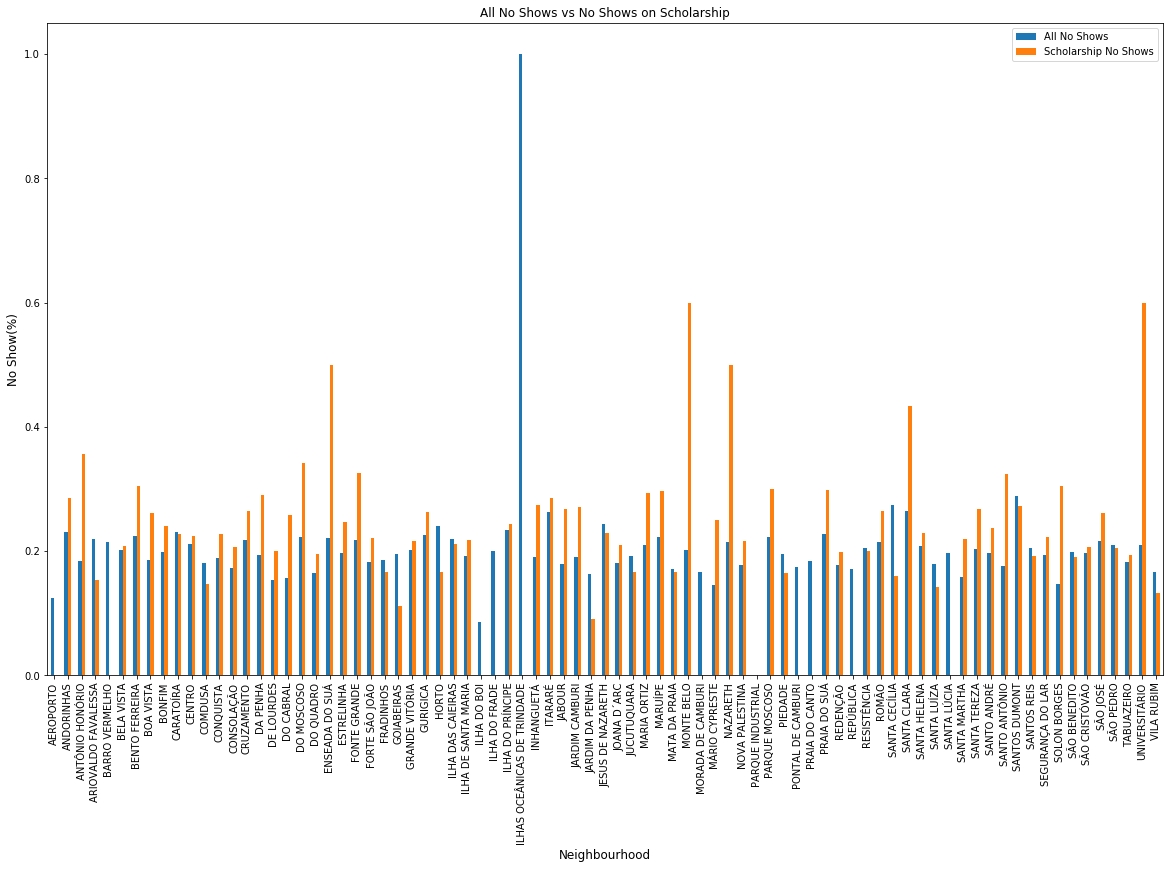

In [30]:
#plot data with plot function
plot_data(df_nb_final,'bar',20,12,"All No Shows vs No Shows on Scholarship","Neighbourhood",'No Show(%)')


Plot of overall proportion of No Shows along with No Shows for patients on scholarship



>**Findings:**

<ul>
    <ul>
        <li>No shows for patients without scholarships are more consistent across neighbourhoods.  
            <li>Scholarship recipients, in many neigbourhoods were less likely to miss appointments
                <li>Neighbourhoods where a patient lives plays a significant role in missed appoints for Scholarship patients.
    </ul>
    </ul>

<hr>
<a id='q3'></a>
### Research Question 3: What factor does gender play in customers missing appointments?

In [31]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [32]:
total_male = df.query("gender == 'M'").patientid.count()
total_female = df.query("gender == 'F'").patientid.count()

In [33]:
male_noshow = df.query("gender == 'M' and no_show == 1").patientid.count()
female_noshow = df.query("gender == 'F' and no_show == 1").patientid.count()

In [34]:
prop_male_noshow = male_noshow/total_male
prop_female_noshow = female_noshow/total_female
prop_male_noshow, prop_female_noshow

(0.19967947889471915, 0.20314587973273943)

- Generate proportional percentages for each gender

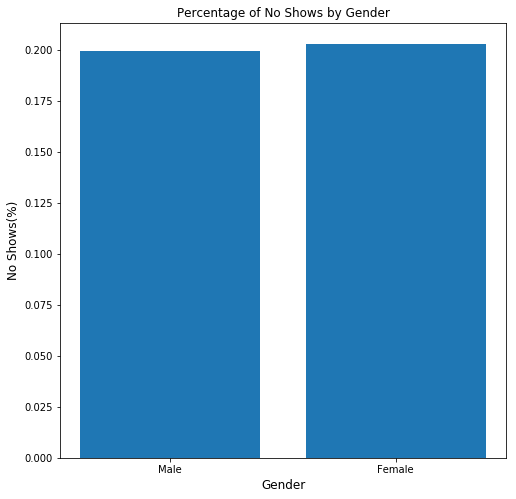

In [35]:
#Plot function not used here since data frame is not  being plotted
locations = [1, 2]
heights = [prop_male_noshow, prop_female_noshow]
labels = ['Male', 'Female']
plt.figure(figsize=(8,8))
plt.bar(locations, heights, tick_label=labels)
plt.title('Percentage of No Shows by Gender')
plt.xlabel("Gender",fontsize=12)
plt.ylabel('No Shows(%)',fontsize=12);

>**Findings:**

<ul>
    <ul>
While female no shows were higher than males, the differences were very small.  Gender does not appear to be a factor in why customers miss appointments.
    </ul>
    </ul>

<hr>
<a id='q4'></a>
### Research Question 4: Does the day of the week for the appointment lead to more no shows?

In [36]:
df_ns_by_dow = df.groupby('day_of_week')['no_show'].sum()/df.groupby('day_of_week')['no_show'].count()
df_ns_by_dow.head()

day_of_week
Friday      0.212261
Monday      0.206471
Saturday    0.230769
Thursday    0.193541
Tuesday     0.200936
Name: no_show, dtype: float64

- Calculate No Shows by day of week as a proportion of all appoints for normalization and plotting

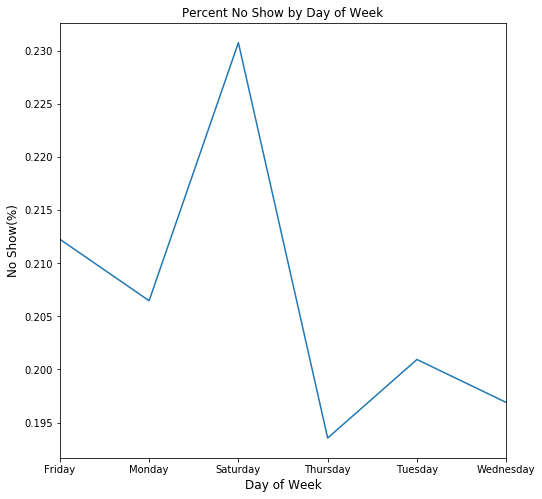

In [37]:
#plot data with plot function
plot_data(df_ns_by_dow,'line',8,8,'Percent No Show by Day of Week','Day of Week','No Show(%)')


>**Findings:**

<ul>
    <ul>

(NOTE: Days of week are listed in alphabetical order)

<li>Appointments Day of week does play a role in patients missing appointments.
<li>Appointments on Friday and Monday (immediately before and after the weekend) have higher no show percentages than the days in the middle of the week.  
<li>Saturdays have the highest no_show percentage 
</ul>
</ul>

<hr>
<a id='q5'></a>
### Research Question 5: If a patient receives an SMS reminder, are they more likely to make their appointments?

In [38]:
df.groupby('sms_received')['no_show'].sum()

sms_received
0    12535
1     9784
Name: no_show, dtype: int64

In [39]:
df.groupby('sms_received')['patientid'].count()

sms_received
0    75045
1    35482
Name: patientid, dtype: int64

In [40]:
df_sms=df.groupby('sms_received')['no_show'].sum() / df.groupby('sms_received')['patientid'].count()
df_sms.head()

sms_received
0    0.167033
1    0.275745
dtype: float64

- Calculate ratios of no shows vs. shows for customers receiving sms reminder

In [41]:
#plot data with plot function
x=[0,1]
labels=['No','Yes']
plot_data(df_sms,'bar',8,8,'No Shows with SMS Reminder','SMS Sent','No Shows(%)',x,labels,'horizontal')


>**Findings:**

<ul>
    <ul>
        <li>The SMS reminder data produced one of the more significant factors leading to missed appointments. 
            <li>The impact was the opposite of what would be expected in this situation.  Over 28% of patients who recieved the SMS were still no shows while less than 17% of patients who did not get the SMS missed their appointment.
    </ul>
    </ul>

<hr>
<a id='q6'></a>
### Research Question 6: Does patient age play a role in the number of no shows?

In [42]:
# Cut age data to divide into groups based on percentiles from describe()
bin_edges = [-1, 18, 37, 55, 115] 

In [43]:
# Labels for the four age level groups
bin_names = ['18 and under', '19 to 37', '38 to 55', '56 and over'] # Name each age group category

In [44]:
# Creates acidity_levels column
df['age_groups'] = pd.cut(df['age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

patientid  appointmentid gender        scheduledday appointmentday  age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   56   

       neighbourhood  scholarship  hipertension  diabetes  alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   handcap  sms_received  no_show day_of_week  day_of_weekn  day_of_mthn  \
0        0             0        0      Friday             4           29   
1        0             0        0      Friday             4           29   
2        0             0        0      Friday             4           29   
3        0             0        0      Friday             4           29   
4        0             0        0      Friday             4           29   

     age_groups  
0   56 and over  
1   56 and over  
2   56 and over  
3  18 and under  
4   56 and over

In [45]:
#generate filtered/summarized data frames for use in analysis
# create data frames with subsets of data
df_noshow = df.query("no_show == 1")
df_show = df.query("no_show == 0")

In [46]:
# Generate data to plot as a ratio
df_ageg_noshow = df_noshow.groupby('age_groups')['no_show'].count()/df.groupby('age_groups')['no_show'].count()

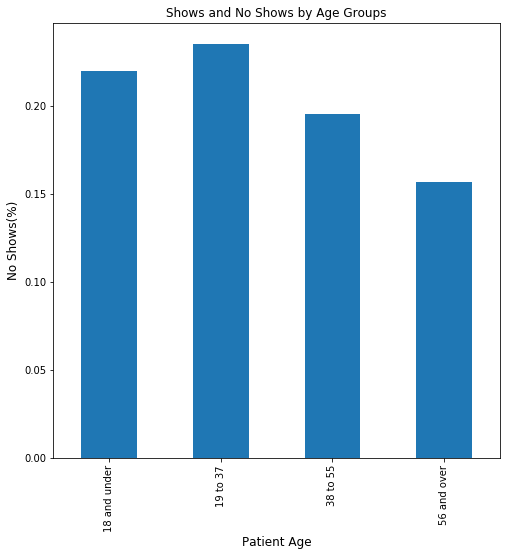

In [47]:
#plot data with plot function
plot_data(df_ageg_noshow,'bar',8,8,'Shows and No Shows by Age Groups','Patient Age','No Shows(%)')


>**Findings:**

<ul>
    <ul>
        <li>It is clear that younger patients have a higher tendency to miss appointments.
            <li>Further analysis is done below to get into further details.

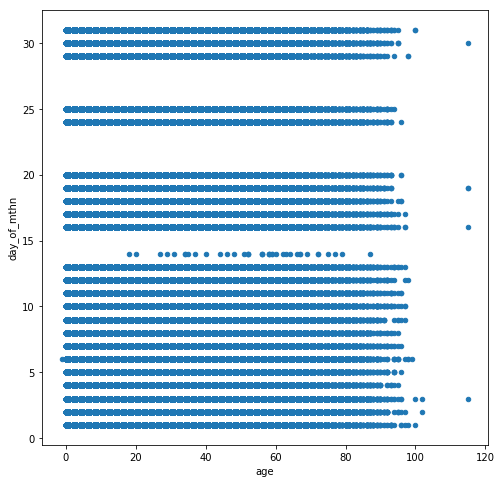

In [48]:
#While boolean type data does not easily lend itself to 2d Plotting, 
#this scatter plot shows a breakdown of patient age by appointment day of month
df.plot(kind='scatter',y='day_of_mthn',x='age',figsize=(8,8))

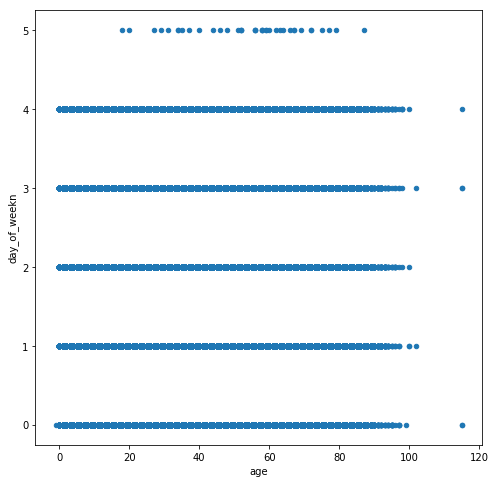

In [49]:
#Another scatter view of patient age and appointment day of week.
df.plot(kind='scatter',y='day_of_weekn',x='age',figsize=(8,8))

In [50]:
# Create data points based on actual age instead of age groups
df_age_noshow = df_noshow.groupby('age')['no_show'].count()/df.groupby('age')['no_show'].count()

In [51]:
#plot data with plot function
plot_data(df_age_noshow,'line',8,8,'No Shows by Age','Patient Age','No Shows(%)',None,None,None,['No Show'])

> **Findings**:

<ul>
    <ul>
        <li>Findings are consistent with the age group plots but the detailed breakdown provides a better idea of what the data is telling us
<li>No Shows peak at approximately age 16-17 and then follow a steady downward trend until patients surpass 80 years old
<li>No Shows are consistently lowest for patients between 60 and 80 years old 
        <li>Data for elderly patients shows very erratic changes</li>
        <li>The very young and very old patients never scheduled appointments on Saturdays.</li>
<br>
<b>Due to the findings regarding SMS reminders discussed earlier, SMS is added to the age plot below to determine if there is correlation.</b>

</ul>
</ul>

In [52]:
# Create SMS data points as a proportion and combine this data fram with df_age_noshow
df_sms_rcvd = df_noshow.groupby('age')['sms_received'].sum()/df.groupby('age')['sms_received'].count()
comb_data = pd.concat([df_age_noshow,df_sms_rcvd],axis=1)

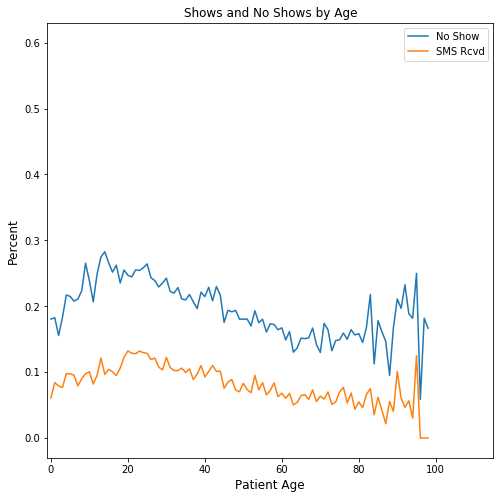

In [53]:
#Plot data with plot function
legend_lbl=["No Show","SMS Rcvd"]
plot_data(comb_data,'line',8,8,'Shows and No Shows by Age','Patient Age','Percent',None,None,None,legend_lbl)


> **Findings**:

<ul>
    <ul>
        <li>SMS reminders by age follow similar trends that are shown in the No Show by age data. </li>
        <li>Younger patients have a higher tendency to get SMS reminders but those reminders are not resulting in lower rates of missed appointments.</li>
    </ul>
    </ul>
    
<hr>

<a id='q7'></a>
### Research Question 7: Do patients with pre-existing conditions have a tendency to make their appoints more often?

In [54]:
# Create a new column which is a sum of all pre-existing conditions for use in analysis.
df['preexisting_condition'] = df[['diabetes', 'alcoholism','hipertension','handcap']].sum(axis=1)

In [55]:
df.groupby('preexisting_condition')['patientid'].count()

preexisting_condition
0    84115
1    18123
2     7658
3      618
4       13
Name: patientid, dtype: int64

In [56]:
df_noshow[["hipertension","alcoholism","diabetes","handcap"]].apply(lambda row: np.sum(row),axis=0)

hipertension    3772
alcoholism       677
diabetes        1430
handcap          407
dtype: int64

- Counts by number of pre-existing conditions and number of each individual pre-existing condition.

In [57]:
#Calculate ratios for each individual pre-existing condition.
df_cond = df_noshow[["hipertension","alcoholism","diabetes","handcap"]].apply(lambda row: np.sum(row),axis=0) / df[["hipertension","alcoholism","diabetes","handcap"]].apply(lambda row: np.sum(row),axis=0)
df_cond.head()

hipertension    0.173020
alcoholism      0.201488
diabetes        0.180033
handcap         0.181615
dtype: float64

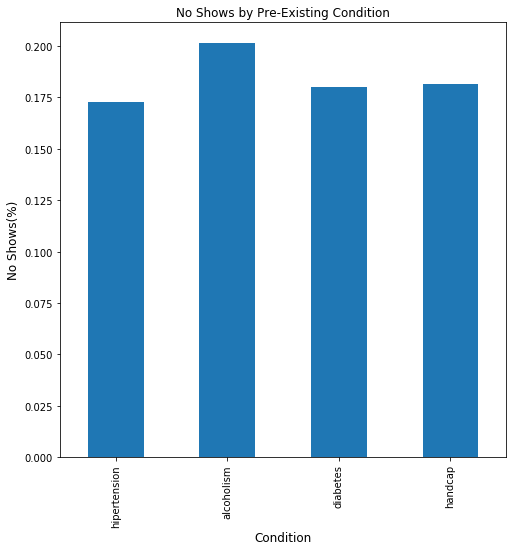

In [58]:
#Plot data with plot function
plot_data(df_cond,'bar',8,8,'No Shows by Pre-Existing Condition','Condition','No Shows(%)')

In [59]:
# Generate proportionate data for plotting
df_pre=df.groupby('preexisting_condition')['no_show'].sum() / df.groupby('preexisting_condition')['patientid'].count()
df_pre.head()

preexisting_condition
0    0.209273
1    0.179275
2    0.178637
3    0.153722
4    0.307692
dtype: float64

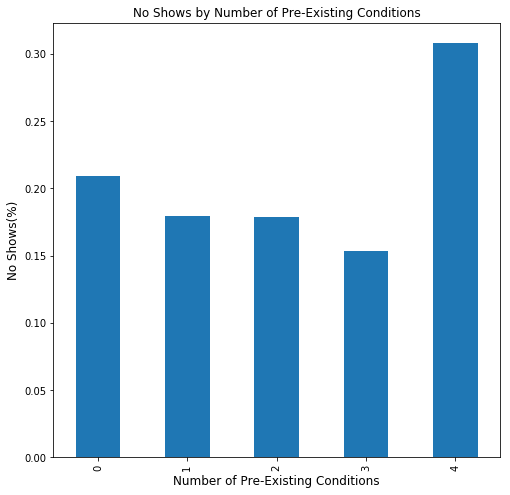

In [60]:
#Plot data with plot function
plot_data(df_pre,'bar',8,8,'No Shows by Number of Pre-Existing Conditions','Number of Pre-Existing Conditions','No Shows(%)')

>**Findings**:

<ul>
    <ul>
<li>Patients with between 1 and 3 pre-existing conditions are more likely to make their appointments than a patient with no pre-existing conditions</li>
<li>Patients with 4 pre-existing conditions are twice as likely to miss their appointment when compared to a patient with 3 conditions.  These patients are significantly more likely to miss appointments that all other groups plotted.</li>
<li>Individual conditions do exhibit a fairly consistent level of no-shows across all conditions but alcoholism has a higer ration than the other conditions.</li>
    </ul>
</ul>
<hr>

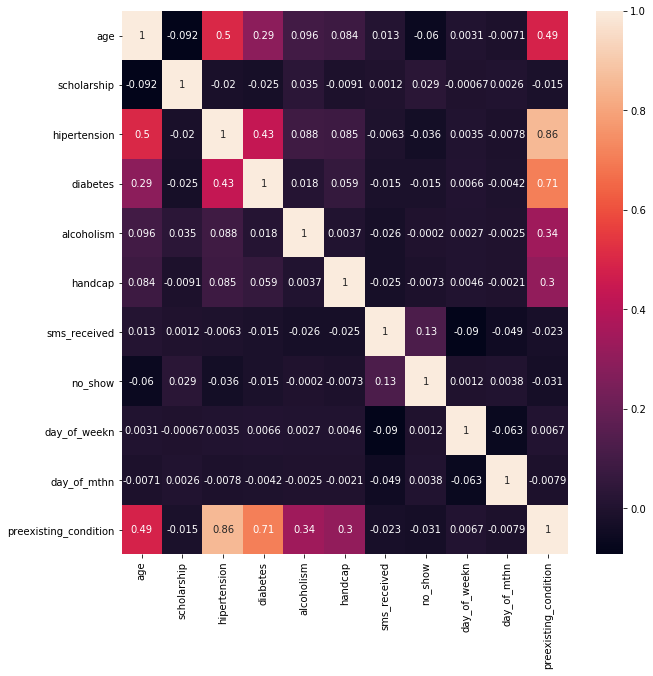

In [61]:
#Generate a correlation matrix of factors, non-numeric elements were dropped
df_matrix = df.copy()
df_matrix.drop(['appointmentday','patientid','scheduledday','neighbourhood','day_of_week','appointmentid','age_groups'],axis=1,inplace=True)

fig, ax = plt.subplots(figsize=(10,10)) 
corr = df_matrix.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

>**Correlation Matrix Findings**

<ul>
    <ul>
<li>The strongest correlations to the No Show patients was an sms reminder and scholarship. These were noted previously as well.</li>
        <li>As expected, individual pre-existing conditions exhibit a strong correlation with the preexisting condition column and this data is not necessary relevant for decision making.</li>
        <li>Age showed a strong correlation to hypertension and diabetes but less so with alcoholism and a handicap.</li>
    </ul>
    </ul>
<hr>    
        

<a id='conclusions'></a>
## Conclusions

<b>The No-Show Dataset:</b> Thedata set was very clean upon initial review and required very little data cleaning to make it usable.  However steps were taken to enhance usability in the analysis process.  There were 110,527 rows and 14 columns in the data set.  

<b>Data Analysis Approach:</b> The majority of the data in the data set was boolean in nature.  While this made it relatively simple to analyze, convert to proportional data and summarize, it also meant there was less need for more in-depth statistical analsys to draw conclusions.  

The "age" data was more variable and was "cut" based on the generated percentiles to develop a view of no-show information by age groups vs individual ages.

<b>Analysis Outcome:</b> Individual findings are show after the conclusion of the work for each question and the below is an overall summary of the process.

<li><b>Scholarship is a contributing factor to appointment no shows.</b></li>
    <ul>
        <li>Patients using the Scholarship (Brazillian Welfare System) program, missed approximately 24% of their appointments, nearly 4% more than patients that were not part of the program.</li>
        <li>At a neighbourhood level the data was pretty consistent but when looking at scholarship no-shows by neighbourhood, there was considerably more variation (25% higher standard deviation than non-scholarship)</li>
    </ul>
<li><b>Appointment Day of Week makes a difference</b></li>
<ul>
    <li>Appointments scheduled for Friday, Saturday and Monday are more likely to result in no-shows.</li>
    </ul>
<li><b>SMS reminders do not reverse no-show trends based on the data available.</b></li>
    <ul>
        <li>We don't know what the no-show data looked like before SMS reminders were available, but the current data shows that missed appoints were actually higher amounts.</li>
    </ul>
<li><b>Younger patients are more likely to miss appointments</b></li>
    <ul>
    <li>Both the cut age data and the actual age data support findings that younger patients are much more likely to miss appointments</li>
    <li>There was significant variation in the no-show data for elderly patients when viewed individually but the grouped age data shows that elderly patients are more likely to keep their appointments</li>
    <li>Overlaying SMS reminders on the age chart show that SMS trends were very similar to no-show trends.  Younger patients are more likely to get SMS reminders but also more likely to miss appointments</li>
    </ul>
<li><b>Pre-existing conditions</b></li>
<ul>
    <li>Individual pre-existing conditions data show that patients with Hypertension, Diabetes, Alcoholism or a Handicap miss appointments less than patients without one of these conditions (NOTE: Patients with alcoholism have the highest no-show rate of the 4).</li>
    <li>When looking at the number of pre-existing conditions, we find that missing appointments is less likely when you have more than 1 pre-existing condition and less than 4.  Just 13 patients had 4 pre-existing conditions but the no-show rate for that data point was the highest (30.7%) of any findings in this analysis. </li>
    </ul>     

#### Chris Bartsch
Investigate a Dataset Project<br>
Udacity Data Analyst Nano Degree Program<br>
June 17, 2018<br>